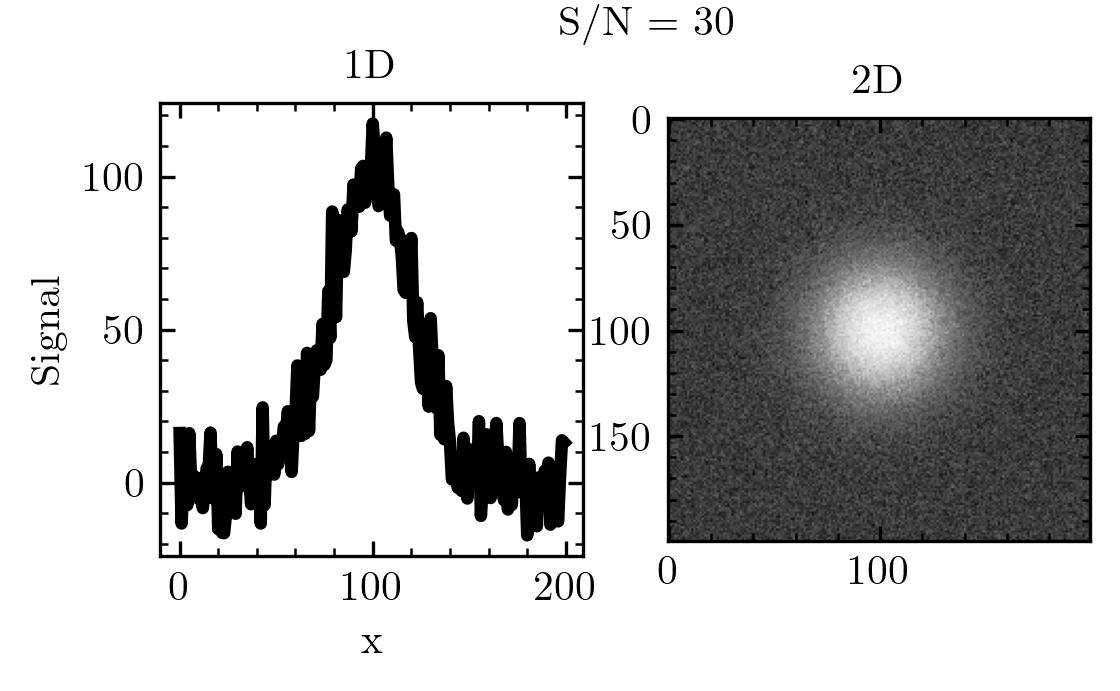

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import imageio

plt.style.use('/home/gmbrandt/Documents/papers/mesa.mplstyle')

def gaussian_2d(x, y, mu, amplitude):
    z= np.exp((-(x-mu)**2 - (y-mu)**2)/30**2)
    return z/np.max(z) * amplitude

def gaussian_1d(x, mu, amplitude):
    return gaussian_2d(x, 0, mu, amplitude)

amplitude = 100
mu = 100
x = np.arange(200)
z = gaussian_1d(x, mu, 100)
X, Y = np.meshgrid(x, x)
Z = gaussian_2d(X, Y, mu, 100)


def plot_example(sn, title):
    width = 30
    noise = np.random.normal(loc=0, scale=np.sqrt(width/4)*amplitude/sn, size=len(x))
    noise2d = np.random.normal(loc=0, scale=width/16*amplitude/sn, size=(len(x), len(x)))
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].plot(x, z + noise, color='k', lw=3)
    axes[0].set_title('1D')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('Signal')
    axes[1].set_title('2D')
    axes[1].imshow(Z + noise2d, cmap='Greys_r')
    plt.annotate(f'S/N = {sn}', xy=(0.5, 0.95), xycoords='figure fraction')
    plt.savefig(title, dpi=300)

plot_example(30, 'test.png')
plt.show()

In [17]:
filenames = []

sn = [1, 5, 25, 100, 500, np.inf]
for signal_to_noise in sn:
    fname = 'test' + str(signal_to_noise) + '.png'
    plot_example(signal_to_noise, fname)
    filenames.append(fname)
    plt.close()
    
# build gif
with imageio.get_writer('mygif.gif', mode='I', fps=.6) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        